In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
sns.set_style("whitegrid")

In [2]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
lab_desktop = False

if lab_desktop : 
    path = '/home/INT/mifsud.l/Bureau/results'
    laminar_info_path = '/home/INT/mifsud.l/Bureau/Lists&Documentation/laminar_info/docs/TommyLaminarInfo.xlsx'
    session = 't150327002'

else : 
    path = '/home/laurie/Bureau/pattern_classification/results/classif_new_data'
    laminar_info_path = '/home/laurie/Bureau/pattern_classification/data/Tommy_new/TommyLaminarInfo.xlsx'
    session = 't150204001'
    
acc_df = pd.read_csv(f'{path}/{session}_LogReg_rate.csv')
acc_df_sync = pd.read_csv(f'{path}/{session}_LogReg_sync.csv')
laminar_info = pd.read_excel(laminar_info_path)

In [4]:
acc_df.head()

,Unnamed: 0,split,data_type,period,probe,target_type,accuracy,y_true,y_pred
0,0,0,test,Touch_time,P1/P2,trial_type,0.694444,[2 2 3 1 2 2 1 1 3 1 3 1 3 3 1 3 2 3 2 1 3 2 1...,[2 2 3 2 2 3 1 1 3 1 1 1 3 2 1 3 2 3 3 1 3 2 2...
1,1,0,shuff,Touch_time,P1/P2,trial_type,0.388889,[2 2 3 1 2 2 1 1 3 1 3 1 3 3 1 3 2 3 2 1 3 2 1...,[3 1 1 3 2 3 1 2 2 2 2 3 2 1 1 1 2 2 1 1 1 1 1...
2,2,0,test,Touch_time,P1/P2,position,0.361111,[2 3 4 2 3 4 4 2 3 3 2 3 2 4 3 4 3 4 4 4 2 4 4...,[3 3 4 3 4 2 2 2 4 2 3 2 4 4 4 4 4 2 4 2 4 3 4...
3,3,0,shuff,Touch_time,P1/P2,position,0.416667,[2 3 4 2 3 4 4 2 3 3 2 3 2 4 3 4 3 4 4 4 2 4 4...,[4 2 4 3 3 2 4 2 4 2 2 3 2 2 3 4 3 2 3 2 3 3 2...
4,4,0,test,Touch_time,P1/P2,type_and_pos,0.138889,[3 4 8 0 4 5 2 0 7 1 6 1 6 8 1 8 4 8 5 2 6 5 2...,[5 4 8 5 5 6 0 0 8 0 1 6 8 8 2 6 5 6 8 1 8 4 8...


In [5]:
acc_df_sync.head()

,Unnamed: 0,split,data_type,period,sigma,probe,target_type,accuracy,y_true,y_pred
0,0,0,test,Touch_time,50,P1/P2,trial_type,0.833333,[2 3 1 1 1 1 1 1 2 1 3 1 1 2 1 3 2 2 2 2 3 3 2...,[1 3 2 1 1 1 1 1 2 1 3 1 1 2 3 3 2 2 2 1 3 3 2...
1,1,0,shuff,Touch_time,50,P1/P2,trial_type,0.194444,[2 3 1 1 1 1 1 1 2 1 3 1 1 2 1 3 2 2 2 2 3 3 2...,[3 2 1 2 3 3 2 3 1 3 1 3 1 1 1 2 3 2 1 3 2 2 3...
2,2,0,test,Touch_time,50,P1/P2,position,0.277778,[4 2 2 3 4 2 2 4 3 4 4 2 3 2 3 3 2 3 2 4 4 2 3...,[3 2 3 4 3 3 2 3 2 3 2 4 2 2 3 4 3 2 4 4 3 3 2...
3,3,0,shuff,Touch_time,50,P1/P2,position,0.388889,[4 2 2 3 4 2 2 4 3 4 4 2 3 2 3 3 2 3 2 4 4 2 3...,[4 4 2 3 3 2 3 4 3 4 2 4 4 4 4 3 3 3 4 2 2 4 2...
4,4,0,test,Touch_time,50,P1/P2,type_and_pos,0.166667,[5 6 0 1 2 0 0 2 4 2 8 0 1 3 1 7 3 4 3 5 8 6 4...,[1 7 5 2 0 1 2 2 3 1 6 2 0 3 7 8 7 3 5 2 7 1 3...


In [6]:
data_list = [acc_df, acc_df_sync]
periods_names = acc_df['period'].unique().tolist()
laminar_info = laminar_info[laminar_info['Session'] == session]

    
for data in data_list:
    data.drop(columns='Unnamed: 0', inplace=True)
    data.rename(columns={"period": "Task periods", "score" : "accuracy"}, inplace=True)
    data.replace(to_replace = periods_names, value=['Touch', 'Sel', 'SC1', 'SC2', 'SC3', 'Go'], inplace=True)

    
laminar_info = laminar_info[laminar_info['Session'] == session].drop(columns='Layer_Info')


In [13]:
P1 = laminar_info['Probe_Area'][laminar_info['Probe_Num'] == 1.0].values[0]
P2 = laminar_info['Probe_Area'][laminar_info['Probe_Num'] == 2.0].values[0]
acc_df.replace(to_replace = ['P1/P2', 'P1', 'P2'], value=[f'{P1}/{P2}', P1, P2], inplace=True)
acc_df_sync.replace(to_replace = ['P1/P2', 'P1/P1', 'P2/P2'], value=[f'{P1}/{P2}', f'{P1}/{P1}', f'{P2}/{P2}'], inplace=True)

In [7]:
laminar_info

,Session,Probe_Num,Probe_Area
13,t150204001,1.0,PMd
14,t150204001,2.0,M1


In [8]:
acc_df

,split,data_type,Task periods,probe,target_type,accuracy,y_true,y_pred
0,0,test,Touch,P1/P2,trial_type,0.694444,[2 2 3 1 2 2 1 1 3 1 3 1 3 3 1 3 2 3 2 1 3 2 1...,[2 2 3 2 2 3 1 1 3 1 1 1 3 2 1 3 2 3 3 1 3 2 2...
1,0,shuff,Touch,P1/P2,trial_type,0.388889,[2 2 3 1 2 2 1 1 3 1 3 1 3 3 1 3 2 3 2 1 3 2 1...,[3 1 1 3 2 3 1 2 2 2 2 3 2 1 1 1 2 2 1 1 1 1 1...
2,0,test,Touch,P1/P2,position,0.361111,[2 3 4 2 3 4 4 2 3 3 2 3 2 4 3 4 3 4 4 4 2 4 4...,[3 3 4 3 4 2 2 2 4 2 3 2 4 4 4 4 4 2 4 2 4 3 4...
3,0,shuff,Touch,P1/P2,position,0.416667,[2 3 4 2 3 4 4 2 3 3 2 3 2 4 3 4 3 4 4 4 2 4 4...,[4 2 4 3 3 2 4 2 4 2 2 3 2 2 3 4 3 2 3 2 3 3 2...
4,0,test,Touch,P1/P2,type_and_pos,0.138889,[3 4 8 0 4 5 2 0 7 1 6 1 6 8 1 8 4 8 5 2 6 5 2...,[5 4 8 5 5 6 0 0 8 0 1 6 8 8 2 6 5 6 8 1 8 4 8...
...,...,...,...,...,...,...,...,...
5395,49,shuff,Go,P2,trial_type,0.416667,[2 1 1 3 2 1 2 2 2 3 2 2 1 1 3 1 2 3 3 1 2 1 1...,[1 1 1 1 1 3 1 1 2 1 3 2 3 1 1 1 2 1 2 1 2 1 2...
5396,49,test,Go,P2,position,0.694444,[4 3 3 4 3 3 2 4 2 2 3 2 2 4 3 4 3 4 4 4 4 2 2...,[4 2 4 4 4 4 2 4 2 2 3 2 4 4 3 4 2 4 4 4 4 4 2...
5397,49,shuff,Go,P2,position,0.361111,[4 3 3 4 3 3 2 4 2 2 3 2 2 4 3 4 3 4 4 4 4 2 2...,[4 2 2 4 4 4 4 3 3 4 3 3 4 2 4 4 2 4 2 4 2 2 3...
5398,49,test,Go,P2,type_and_pos,0.250000,[5 1 1 8 4 1 3 5 3 6 4 3 0 2 7 2 4 8 8 2 5 0 0...,[2 0 2 7 2 8 5 5 4 8 1 3 0 2 7 0 4 7 5 0 2 5 1...


In [9]:
acc_df_sync

,split,data_type,Task periods,sigma,probe,target_type,accuracy,y_true,y_pred
0,0,test,Touch,50,P1/P2,trial_type,0.833333,[2 3 1 1 1 1 1 1 2 1 3 1 1 2 1 3 2 2 2 2 3 3 2...,[1 3 2 1 1 1 1 1 2 1 3 1 1 2 3 3 2 2 2 1 3 3 2...
1,0,shuff,Touch,50,P1/P2,trial_type,0.194444,[2 3 1 1 1 1 1 1 2 1 3 1 1 2 1 3 2 2 2 2 3 3 2...,[3 2 1 2 3 3 2 3 1 3 1 3 1 1 1 2 3 2 1 3 2 2 3...
2,0,test,Touch,50,P1/P2,position,0.277778,[4 2 2 3 4 2 2 4 3 4 4 2 3 2 3 3 2 3 2 4 4 2 3...,[3 2 3 4 3 3 2 3 2 3 2 4 2 2 3 4 3 2 4 4 3 3 2...
3,0,shuff,Touch,50,P1/P2,position,0.388889,[4 2 2 3 4 2 2 4 3 4 4 2 3 2 3 3 2 3 2 4 4 2 3...,[4 4 2 3 3 2 3 4 3 4 2 4 4 4 4 3 3 3 4 2 2 4 2...
4,0,test,Touch,50,P1/P2,type_and_pos,0.166667,[5 6 0 1 2 0 0 2 4 2 8 0 1 3 1 7 3 4 3 5 8 6 4...,[1 7 5 2 0 1 2 2 3 1 6 2 0 3 7 8 7 3 5 2 7 1 3...
...,...,...,...,...,...,...,...,...,...
5395,49,shuff,Go,50,P2/P2,trial_type,0.388889,[2 1 2 3 3 1 1 1 1 2 1 3 3 1 2 2 3 2 1 3 1 1 3...,[1 3 2 2 1 1 2 1 1 2 2 3 1 3 2 2 3 1 1 1 2 2 2...
5396,49,test,Go,50,P2/P2,position,0.444444,[2 3 4 3 4 4 3 2 3 4 4 2 3 4 3 4 2 3 2 4 2 3 4...,[2 3 2 4 4 4 4 4 4 2 2 2 4 4 2 4 2 2 4 2 3 2 4...
5397,49,shuff,Go,50,P2/P2,position,0.305556,[2 3 4 3 4 4 3 2 3 4 4 2 3 4 3 4 2 3 2 4 2 3 4...,[4 3 3 3 4 3 2 2 4 4 2 2 2 4 4 2 2 2 4 2 2 2 4...
5398,49,test,Go,50,P2/P2,type_and_pos,0.416667,[3 1 5 7 8 2 1 0 1 5 2 6 7 2 4 5 6 4 0 8 0 1 8...,[0 1 5 8 8 2 2 2 5 0 0 6 0 2 0 5 6 3 0 3 0 0 8...


NameError: name 'P1' is not defined

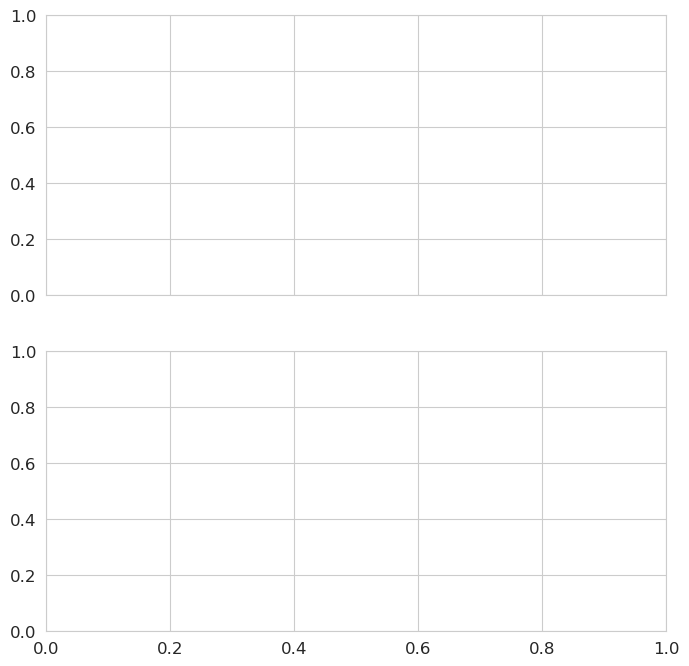

In [11]:
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelpad"] = 12
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12 

target_list = ['trial_type', 'position']

palette_prob_spk = ['#006d2c', '#2ca25f', '#66c2a4']
color_shuff = '#969696'
palette_prob_sync = ['#54278f', '#756bb1', '#9e9ac8']


### Plot Firing rate ### 
spk_accuracy = acc_df

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey= True, dpi=100)  

for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test') & (accuracy_plot["probe"] == f'{P1}/{P2}')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy', color=palette_prob_spk[0], linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=color_shuff, linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - Rate', fontsize= 14, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    #axs[i].set_xticks([0, 0.5, 1.8, 3.1, 4.4, 4.9], ['Touch', 'Sel', 'SC1', 'SC2', 'SC3', 'Go'])
    
plt.subplots_adjust(top=0.9)  
plt.suptitle(f'{session}', fontsize=16)
plt.tight_layout()
#plt.savefig(f'{path}/{session}_LogReg_rate_merged_probes.png')

### Plot Synchony### 

spk_accuracy = acc_df_sync

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey= True, dpi=100)  

for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test') & (accuracy_plot["probe"] == f'{P1}/{P2}')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy',color=palette_prob_sync[0], linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=color_shuff, linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - synchrony', fontsize= 14, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    
    
plt.suptitle(f'{session}', fontsize=16)
plt.tight_layout()

#plt.savefig(f'{path}/{session}_LogReg_sync_merged_probes.png')

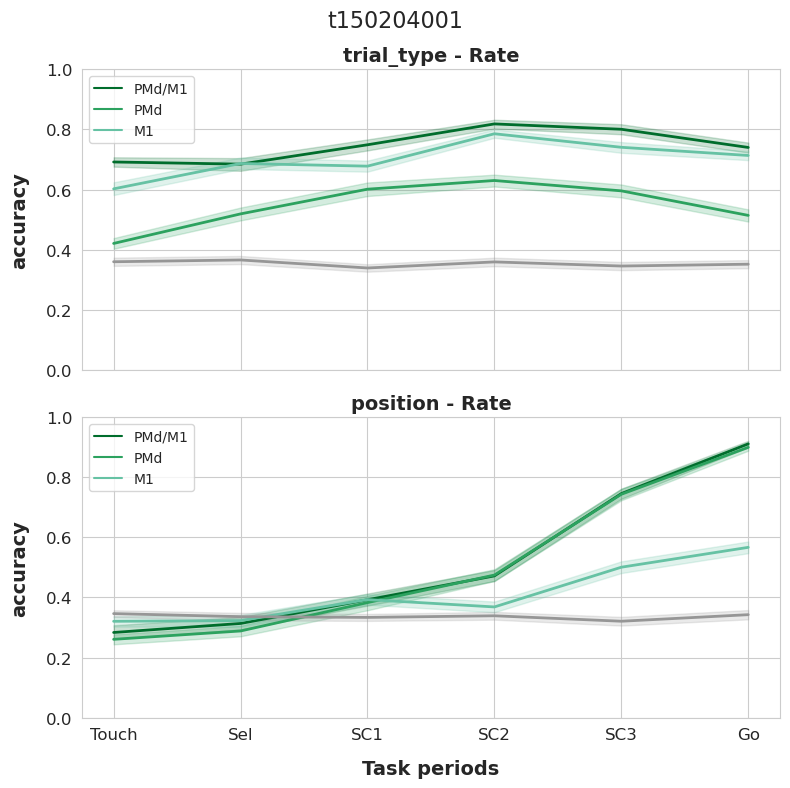

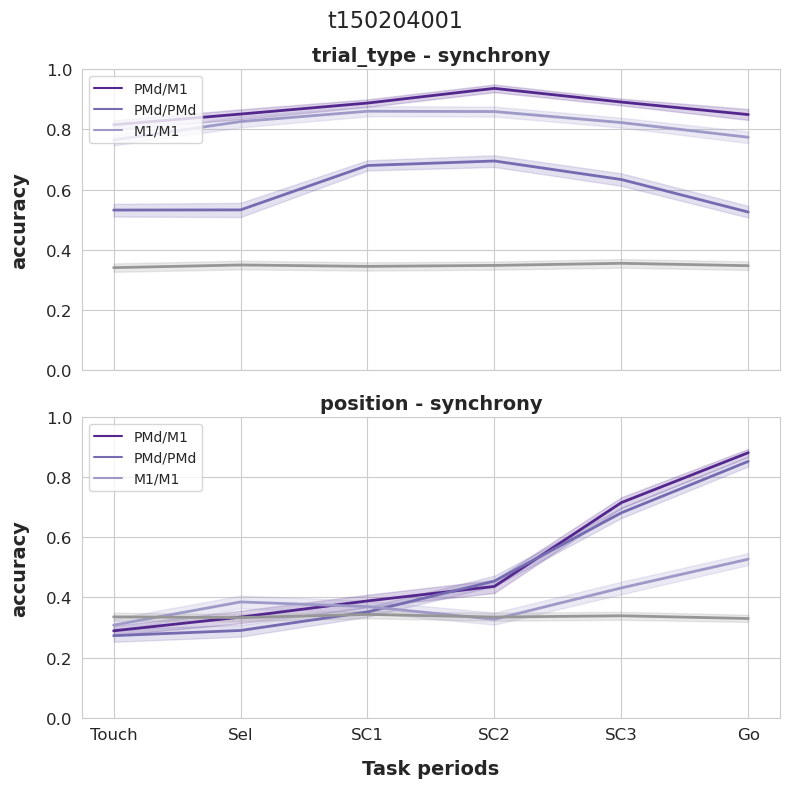

In [14]:
### Plot Firing rate ### 
spk_accuracy = acc_df

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey= True, dpi=100)  

for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy', hue='probe', palette=palette_prob_spk, linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=color_shuff, linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - Rate', fontsize= 14, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    axs[i].legend(loc='upper left')
    
plt.subplots_adjust(top=0.9)  
plt.suptitle(f'{session}', fontsize=16)
plt.tight_layout()
plt.savefig(f'{path}/{session}_LogReg_rate.png')


### Plot Synchony### 

spk_accuracy = acc_df_sync

fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey= True, dpi=100)  

for i, target in enumerate(target_list):

    accuracy_plot = spk_accuracy
    
    accuracy_plot_test = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'test')]
    sns.lineplot(accuracy_plot_test, x='Task periods', y='accuracy', hue='probe', palette=palette_prob_sync, linewidth = 2., ax=axs[i])


    accuracy_plot_shuff = accuracy_plot[(accuracy_plot["target_type"] == target) & (accuracy_plot["data_type"] == 'shuff')]
    sns.lineplot(accuracy_plot_shuff, x='Task periods', y='accuracy', color=color_shuff, linewidth = 2., ax=axs[i])

    axs[i].set_title(f'{target} - synchrony', fontsize= 14, weight='bold')
    axs[i].set_yticks(np.arange(0,1.1,0.2))
    axs[i].legend(loc='upper left')
    
plt.suptitle(f'{session}', fontsize=16)
plt.tight_layout()

#plt.savefig(f'{path}/{session}_LogReg_sync.png')
